In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [10]:
print(train[numerical_feats].columns)
print("*"*80)
print(train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

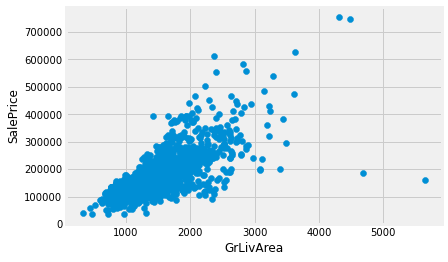

In [11]:
# 이상치 확인, 제거
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [12]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['1stFlrSF']>2700) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['2ndFlrSF']>1700) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<600000)].index)

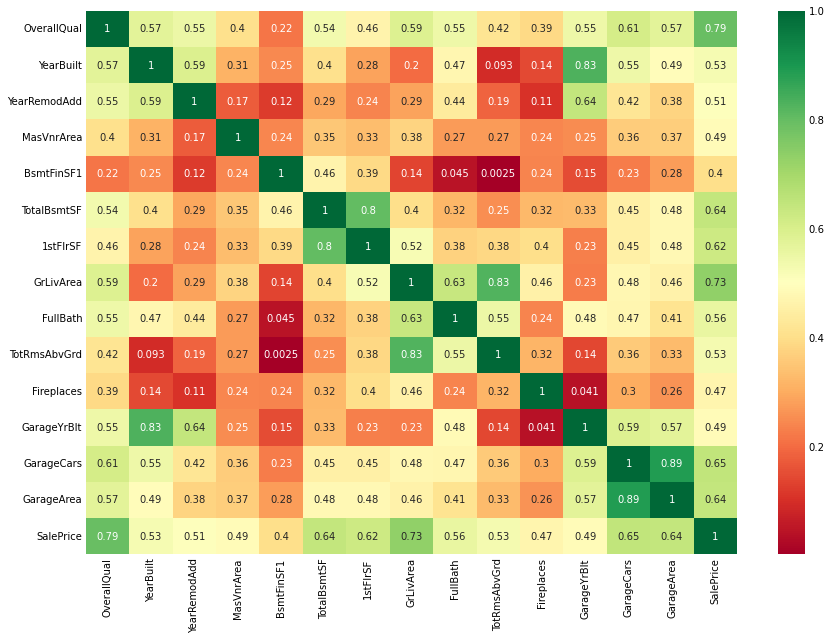

In [13]:
# 상관계수
corrmat = train.corr()
corr_columns = corrmat.index[abs(corrmat["SalePrice"])>=0.4] # 상관계수 0.4 이상만 포함
corr_columns
      
# 히트맵
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(train[corr_columns].corr(),annot=True,cmap="RdYlGn")

In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
df_train = train.drop('SalePrice', axis=1)

In [17]:
df = pd.concat((df_train,test))

In [18]:
from scipy import stats
from scipy.stats import norm

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

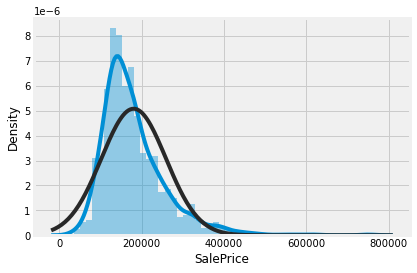

In [19]:
# target변수 확인
sns.distplot(train['SalePrice'],fit = norm)

((array([-3.30321328, -3.04586684, -2.90274569, ...,  2.90274569,
          3.04586684,  3.30321328]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (73446.59585035362, 180308.20896551723, 0.9327380237982287))

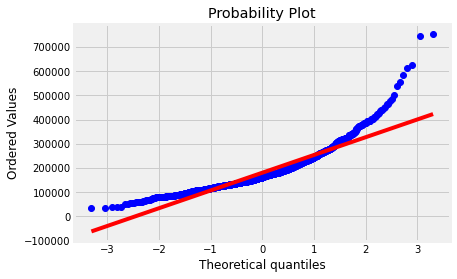

In [20]:
stats.probplot(train['SalePrice'], plot=plt)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

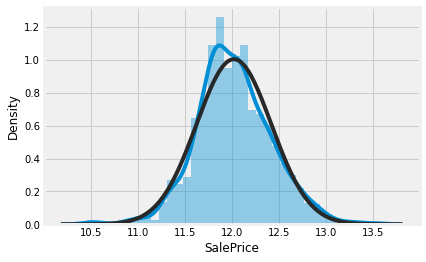

In [21]:
# 로그변환
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'],fit=norm)

((array([-3.30321328, -3.04586684, -2.90274569, ...,  2.90274569,
          3.04586684,  3.30321328]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39620957726805567, 12.02160060192864, 0.9953575377359865))

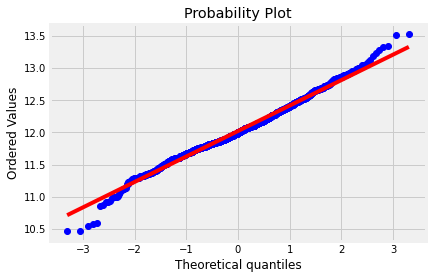

In [22]:
stats.probplot(train['SalePrice'], plot=plt)

In [23]:
# target 안에 타겟변수 집값 정규화 시킨 거 저장해주기
target = train['SalePrice']

In [24]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      483
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [25]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio
PoolQC,99.690615
MiscFeature,96.424888
Alley,93.193537
Fence,80.371262
FireplaceQu,48.779649
LotFrontage,16.603644
GarageFinish,5.465796
GarageQual,5.465796
GarageCond,5.465796
GarageYrBlt,5.465796


<AxesSubplot:>

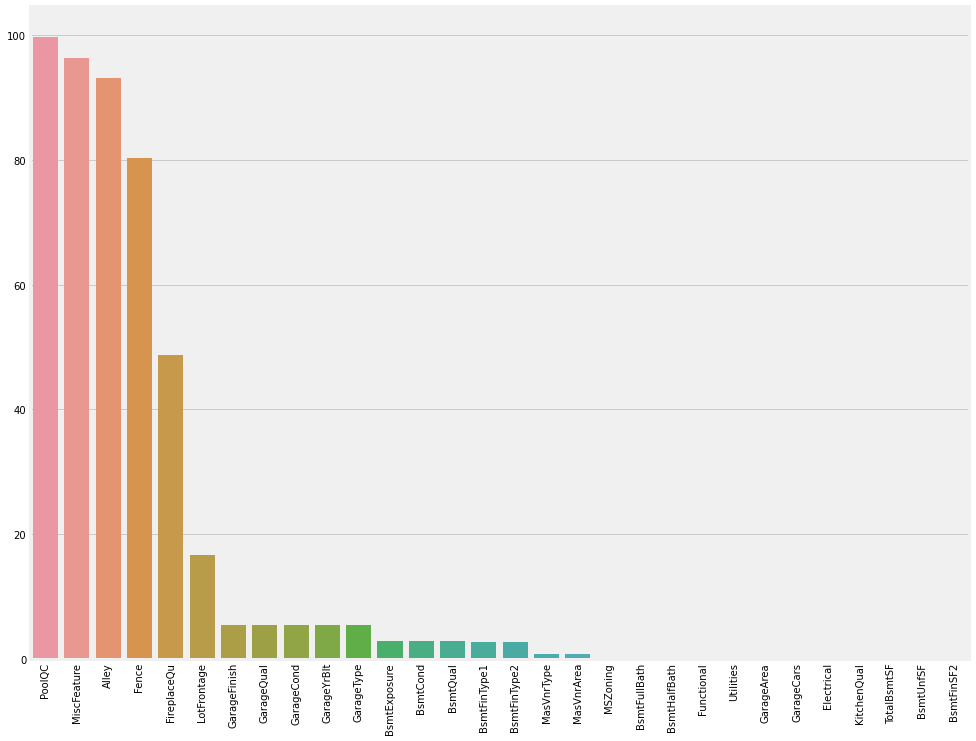

In [26]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=null_df.index, y=null_df)

In [27]:
# 결측값 처리
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [28]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [29]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [30]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [31]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [32]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [33]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [34]:
df = df.drop(['Utilities'], axis=1)

In [35]:
df["Functional"] = df["Functional"].fillna("Typ")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [36]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)

,Missing Ratio


In [37]:
#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)
#OverallCond
df['OverallCond'] = df['OverallCond'].astype(str)
#YrSold,MoSold
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [38]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [39]:
# 순서형과 명목형 데이터 분리 - 명목형
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,2,2008,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,None,None,None,5,2007,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,None,None,None,9,2008,WD,Normal


In [40]:
# 명목형 데이터 칼럼들을 list로 저장
li_obj = list(df_obj.columns)

In [41]:
# 수치형 데이터
df_num = df.select_dtypes(exclude = 'object')
df_num.head(3)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1,65.0,8450,7,2003,2003,196.0,706.0,0.0,150.0,...,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,2,80.0,9600,6,1976,1976,0.0,978.0,0.0,284.0,...,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,3,68.0,11250,7,2001,2002,162.0,486.0,0.0,434.0,...,2001.0,2.0,608.0,0,42,0,0,0,0,0


In [42]:
li_num = list(df_num.columns)

In [43]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(df[c].values)) 
    df[c] = lb.transform(list(df[c].values))

In [44]:
# 파생변수 생성
df['TotalSF'] = (df['TotalBsmtSF'] 
                       + df['1stFlrSF'] 
                       + df['2ndFlrSF'])

df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] 
                                 + df['BsmtFinSF2'] 
                                 + df['1stFlrSF'] 
                                 + df['2ndFlrSF']
                                )
                                 

df['Total_Bathrooms'] = (df['FullBath'] 
                               + (0.5 * df['HalfBath']) 
                               + df['BsmtFullBath'] 
                               + (0.5 * df['BsmtHalfBath'])
                              )
                               

df['Total_porch_sf'] = (df['OpenPorchSF'] 
                              + df['3SsnPorch'] 
                              + df['EnclosedPorch'] 
                              + df['ScreenPorch'] 
                              + df['WoodDeckSF']
                             )

In [45]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,1,10,RL,65.0,8450,1,1,3,Lvl,Inside,...,2566.0,4006,2416.0,3.5,61,0,1,1,1,0
1,2,5,RL,80.0,9600,1,1,3,Lvl,FR2,...,2524.0,3952,2240.0,2.5,298,0,0,1,1,1
2,3,10,RL,68.0,11250,1,1,0,Lvl,Inside,...,2706.0,4003,2272.0,3.5,42,0,1,1,1,1
3,4,11,RL,60.0,9550,1,1,0,Lvl,Corner,...,2473.0,3885,1933.0,2.0,307,0,1,1,1,1
4,5,10,RL,84.0,14260,1,1,0,Lvl,FR2,...,3343.0,4000,2853.0,3.5,276,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2,RM,21.0,1936,1,1,3,Lvl,Inside,...,1638.0,3940,1092.0,1.5,0,0,1,0,1,0
1455,2916,2,RM,21.0,1894,1,1,3,Lvl,Inside,...,1638.0,3940,1344.0,1.5,24,0,1,1,1,0
1456,2917,5,RL,160.0,20000,1,1,3,Lvl,Inside,...,2448.0,3956,2448.0,2.0,474,0,0,1,1,1
1457,2918,14,RL,62.0,10441,1,1,3,Lvl,Inside,...,1882.0,3984,1307.0,1.5,112,0,0,0,1,0


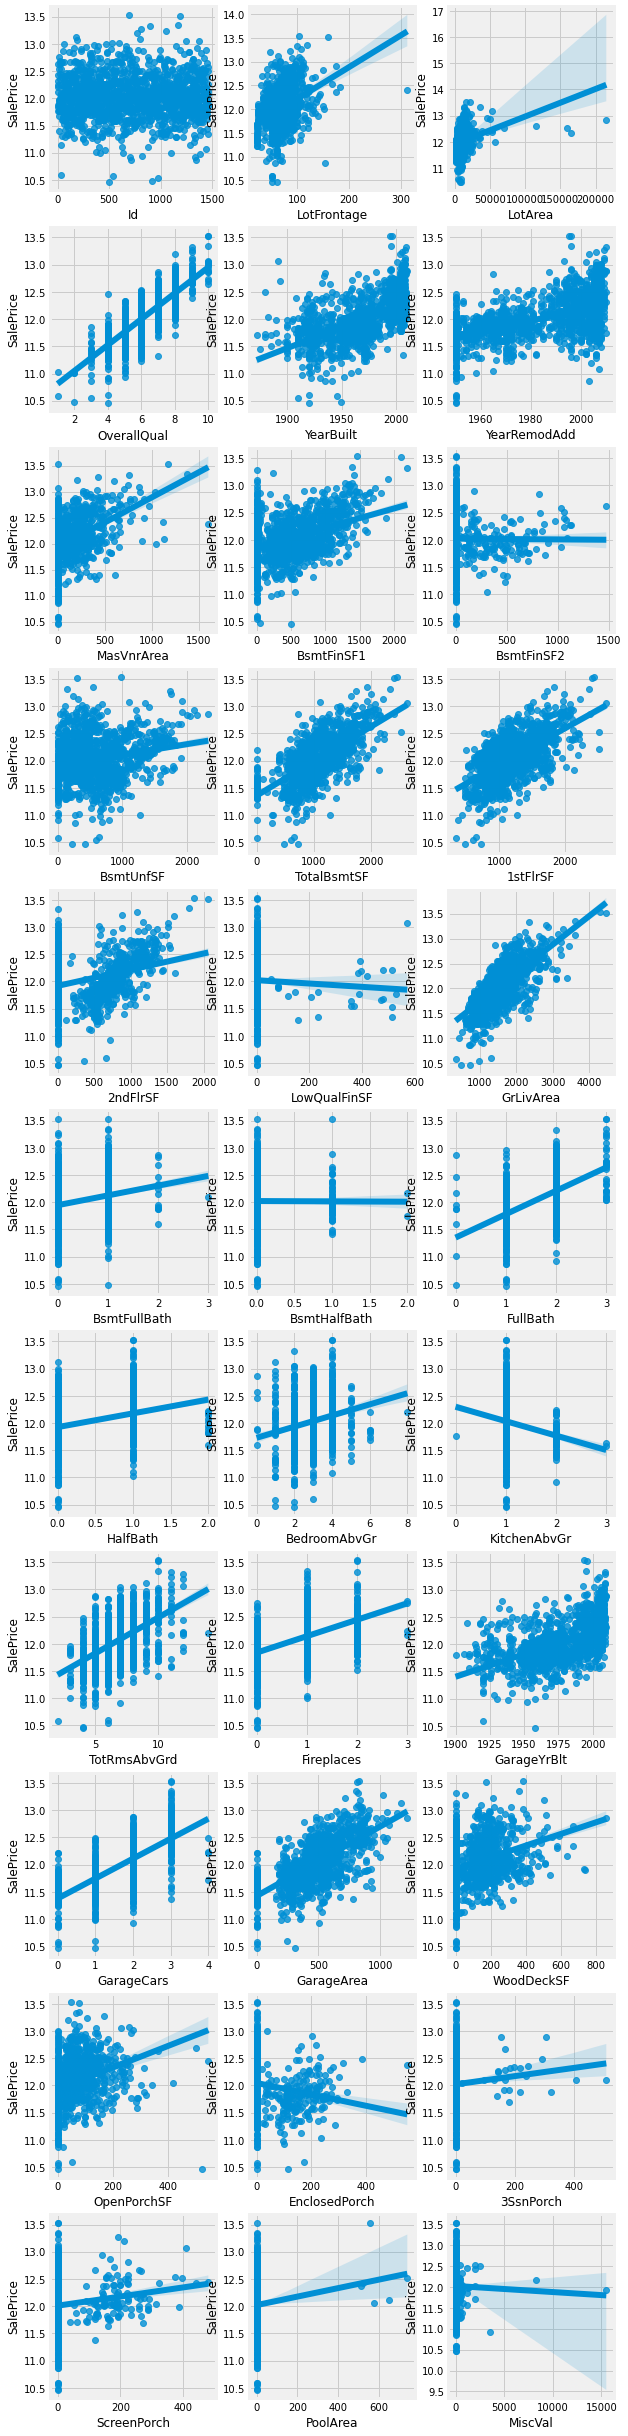

In [47]:
row = 11
col = 3 

fig, axs = plt.subplots(row,col, figsize = (col*3,row*4))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_num):
            sns.regplot(train[li_num[i]],target , ax = axs[r][c])

In [48]:
stats.pearsonr(train[li_num[11]],target)

(0.6162705311824697, 2.1360314073403284e-152)

In [49]:
strong_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
             'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GrLivArea']

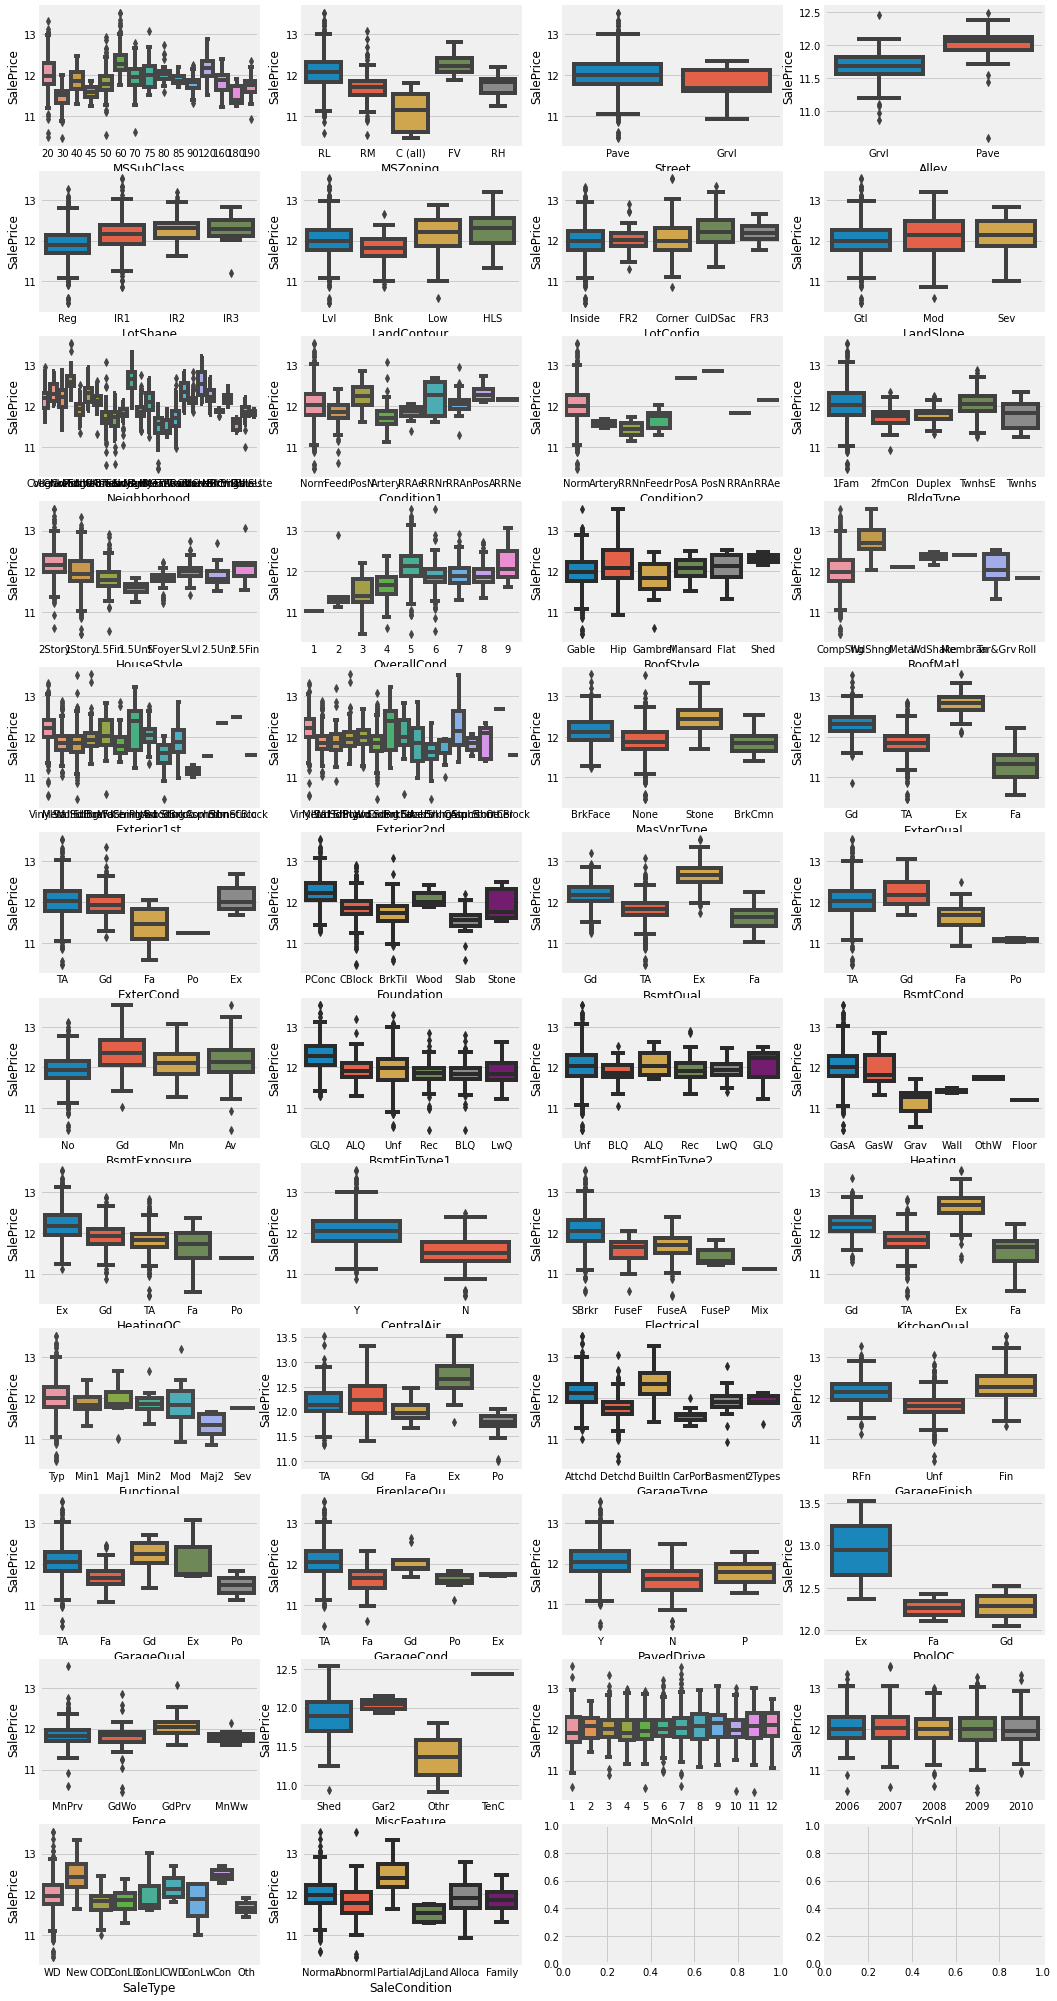

In [50]:
# 범주형 변수 확인
row = 12
col = 4 

fig, axs = plt.subplots(row,col, figsize = (col*4,row*3))

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(li_obj):
            sns.boxplot(train[li_obj[i]],target , ax = axs[r][c])

In [51]:
strong_obj = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

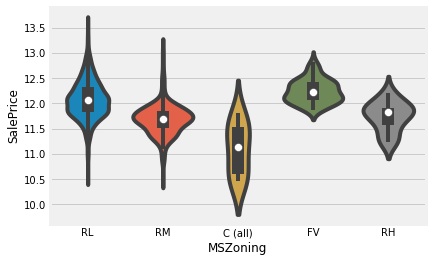

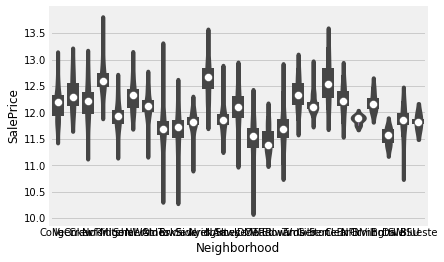

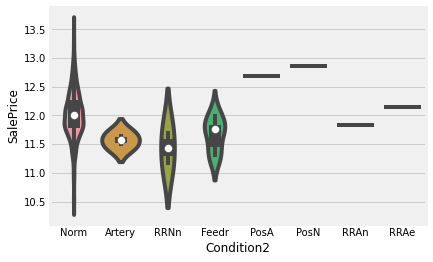

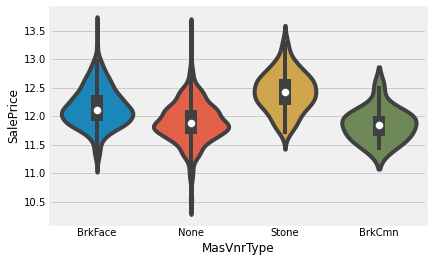

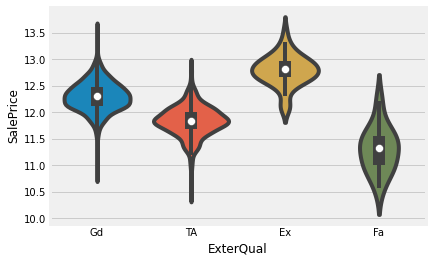

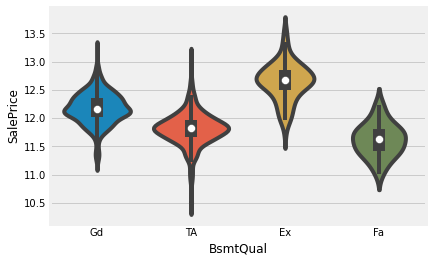

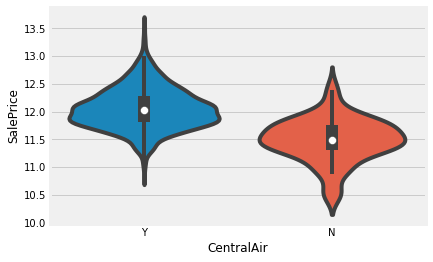

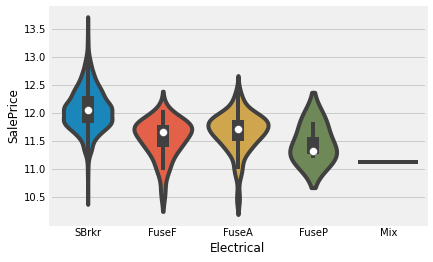

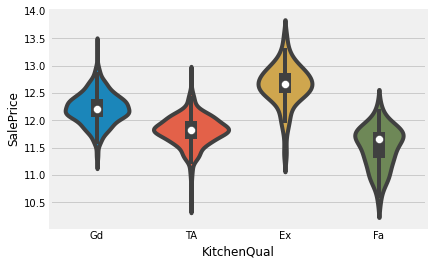

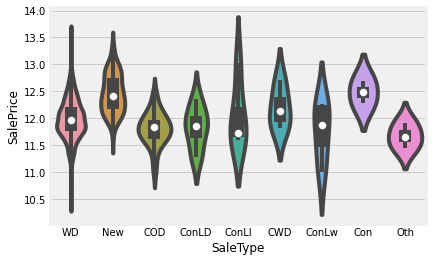

In [52]:
for li in strong_obj:
    sns.violinplot(x= li, y = target, data=train)
    plt.show()

In [53]:
numeric_features = df.dtypes[df.dtypes != "object"].index

In [54]:
from scipy.stats import skew 
skewness = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [55]:
high_skewness = skewness[abs(skewness) > 0.5]
skew_feat = high_skewness.index
print(high_skewness)
print(skew_feat)

MiscVal              21.919304
PoolArea             17.664161
haspool              15.473229
LotArea              13.167323
LowQualFinSF         12.067635
3SsnPorch            11.356127
LandSlope             4.987862
KitchenAbvGr          4.293726
BsmtFinSF2            4.169936
EnclosedPorch         4.021021
ScreenPorch           3.949857
BsmtHalfBath          3.923598
MasVnrArea            2.623822
OpenPorchSF           2.528620
WoodDeckSF            1.849679
Total_porch_sf        1.382622
Total_sqr_footage     1.248461
1stFlrSF              1.215511
LotFrontage           1.110062
GrLivArea             1.056757
BsmtFinSF1            0.983212
TotalSF               0.973652
BsmtUnfSF             0.914001
2ndFlrSF              0.852375
TotRmsAbvGrd          0.751009
Fireplaces            0.728641
HalfBath              0.693902
BsmtFullBath          0.625540
TotalBsmtSF           0.585973
OverallCond           0.563377
YearBuilt            -0.594996
GarageFinish         -0.611502
LotShape

In [56]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0,0,0,8450,0,0,0,1,0.0,0,...,6,5,1,5,2003.0,1,6,1,1,3
1,0,0,0,9600,0,0,0,1,0.0,0,...,6,5,1,5,1976.0,1,6,1,1,3
2,0,0,0,11250,0,0,0,1,0.0,0,...,6,5,1,5,2001.0,1,6,1,1,3


In [57]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat:
    df[feat] = boxcox1p(df[feat], lam)

In [58]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

,MiscVal,PoolArea,haspool,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,...,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,hasgarage,Functional,hasbsmt,Street,PoolQC
0,0.0,0.0,0.0,19.212182,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.187527,0.730463,2.259674,0.730463,0.730463,1.540963
1,0.0,0.0,0.0,19.712205,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.145138,0.730463,2.259674,0.730463,0.730463,1.540963
2,0.0,0.0,0.0,20.347241,0.0,0.0,0.0,0.730463,0.0,0.0,...,2.259674,2.055642,0.730463,2.055642,14.184404,0.730463,2.259674,0.730463,0.730463,1.540963


In [60]:
df = pd.get_dummies(df)

# 많기도 하다
print(df.shape)

(2909, 230)


In [61]:
df

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,10,5.831328,19.212182,0.730463,0.730463,1.540963,0.000000,7,1.820334,...,0,0,0,1,0,0,0,0,1,0
1,2,5,6.221214,19.712205,0.730463,0.730463,1.540963,0.000000,6,2.440268,...,0,0,0,1,0,0,0,0,1,0
2,3,10,5.914940,20.347241,0.730463,0.730463,0.000000,0.000000,7,1.820334,...,0,0,0,1,0,0,0,0,1,0
3,4,11,5.684507,19.691553,0.730463,0.730463,0.000000,0.000000,7,1.820334,...,0,0,0,1,1,0,0,0,0,0
4,5,10,6.314735,21.325160,0.730463,0.730463,0.000000,0.000000,8,1.820334,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,2,3.932510,14.081426,0.730463,0.730463,1.540963,0.000000,4,2.259674,...,0,0,0,1,0,0,0,0,1,0
1455,2916,2,3.932510,14.013314,0.730463,0.730463,1.540963,0.000000,4,1.820334,...,0,0,0,1,1,0,0,0,0,0
1456,2917,5,7.620056,22.782058,0.730463,0.730463,1.540963,0.000000,5,2.259674,...,0,0,0,1,1,0,0,0,0,0
1457,2918,14,5.744420,20.046557,0.730463,0.730463,1.540963,0.000000,5,1.820334,...,0,0,0,1,0,0,0,0,1,0


In [62]:
# 중요변수 확인
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [63]:
new_train = pd.concat([new_train,target], axis=1, sort=False)

<AxesSubplot:>

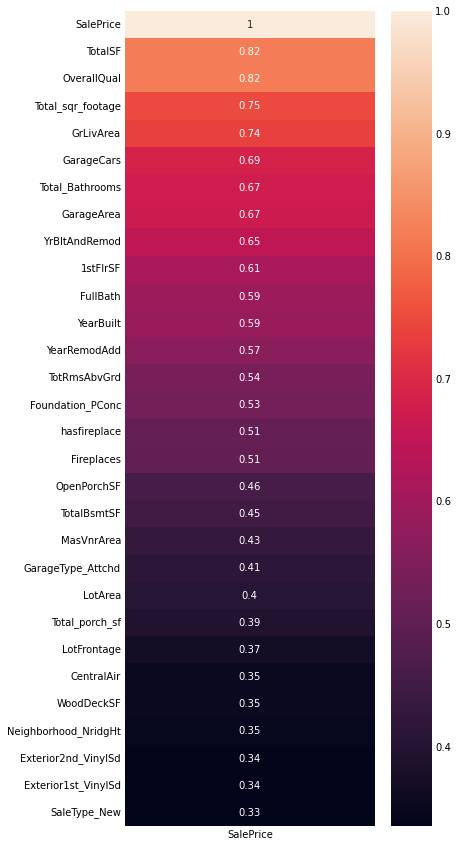

In [64]:
corr_new_train = new_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],
                                ascending=False).head(30),annot=True)

In [65]:
col_corr_dict = corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()

In [66]:
best_columns=[]
for key,value in col_corr_dict.items():
    if ((value>=0.33) & (value<0.9)) | (value<=-0.325):
        best_columns.append(key)
print(len(best_columns))

39


In [67]:
new_train = new_train.drop(['SalePrice'], axis=1)
new_train = new_train.drop(['Id'], axis=1)
new_test = new_test.drop(['Id'], axis=1)

In [68]:
final_train = new_train[best_columns]
final_test = new_test[best_columns]
final_num = list(final_train.columns)

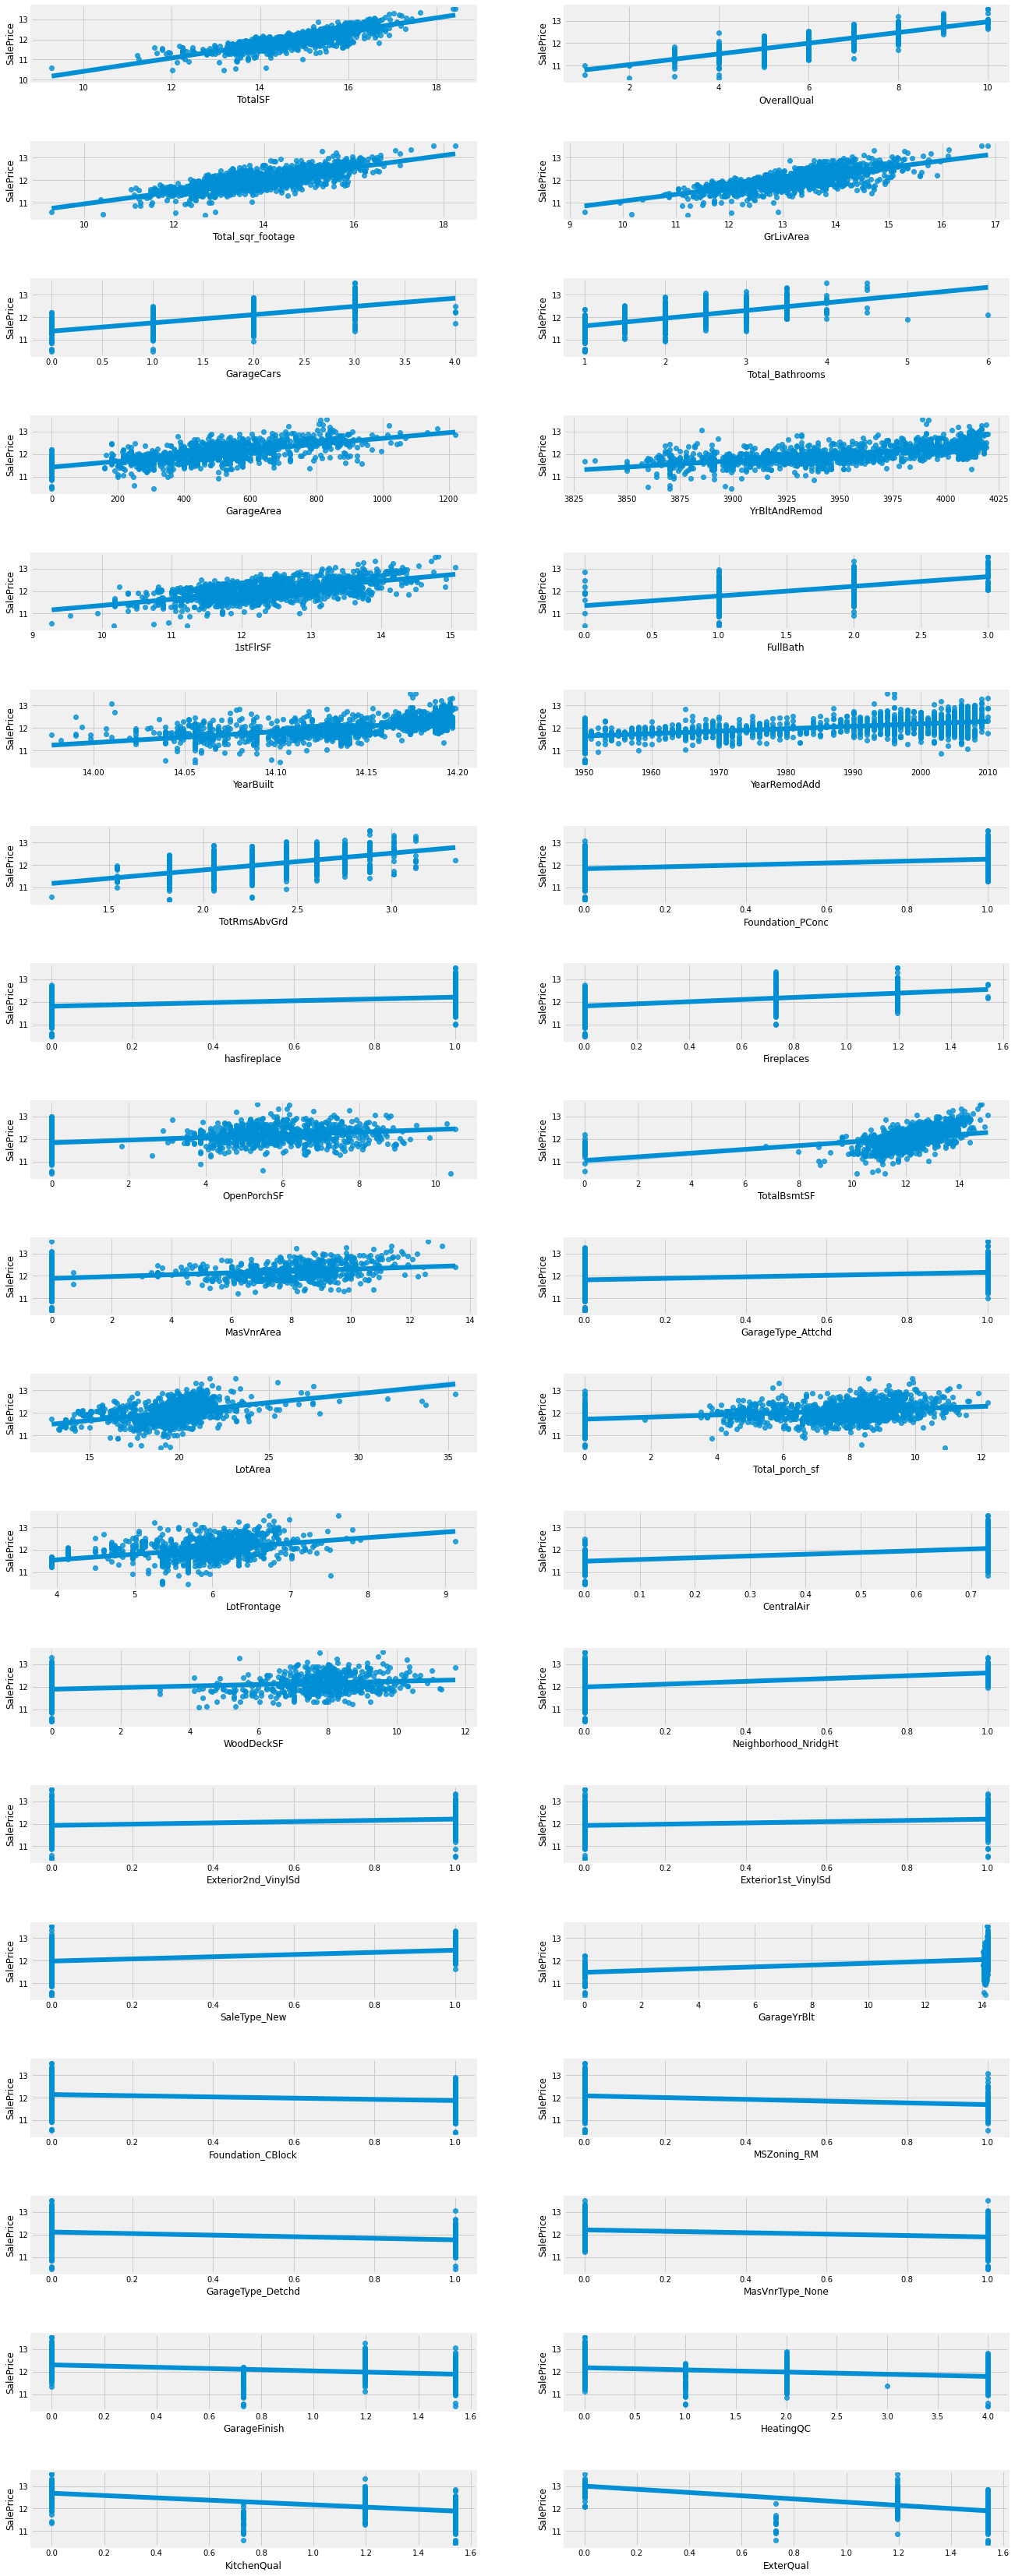

In [69]:
row = 19
col = 2

fig, axs = plt.subplots(row,col, figsize = (20,60))
fig.subplots_adjust(hspace=0.8)

for r in range(0,row):
    for c in range(0,col):
        i = r*col + c
        if i < len(best_columns):
            sns.regplot(final_train[final_num[i]],target,fit_reg=True,marker='o', ax = axs[r][c])

# 모델링

In [70]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

In [71]:
from sklearn.preprocessing import RobustScaler

In [72]:
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [73]:
import statsmodels.api as sm

In [74]:
model = sm.OLS(target.values, new_train)

In [75]:
re = model.fit()

In [76]:
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:23:30   Log-Likelihood:                 1385.3
No. Observations:                1450   AIC:                            -2355.
Df Residuals:                    1242   BIC:                            -1256.
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.0012      0.003     -0.354      0.723      -0.008       0.005
LotFrontage               0.0077      0.008      0.928      0.354      -0.009       0.024
LotArea                   0.0225      0.003      8.304      0.000       0.017       0.028
Street                    0.1565      0.076      2.058      0.040       0.007       0.306
Alley                     0.0158      0.021      0.748      0.454      -0.026       0.057
LotShape                  0.0057      0.005      1.253      0.211      -0.003       0.015
LandSlope                 0.0271      0.022      1.240      0.215      -0.016       0.070
OverallQual               0.0408      0.004      9.204      0.000       0.032       0.049
OverallCond               0.1671      0.015     10.962      0.000       0.137       0.197
YearBuilt               -15.2861     18.808     -0.813      0.417     -52.184      21.612
YearRemodAdd             -0.0255      0.030     -0.846      0.398      -0.085       0.034
MasVnrArea                0.0010      0.003      0.388      0.698      -0.004       0.006
ExterQual                -0.0262      0.014     -1.821      0.069      -0.054       0.002
ExterCond                 0.0073      0.013      0.562      0.574      -0.018       0.033
BsmtQual                 -0.0085      0.004     -2.270      0.023      -0.016      -0.001
BsmtCond                  0.0110      0.008      1.365      0.173      -0.005       0.027
BsmtExposure             -0.0057      0.006     -0.894      0.371      -0.018       0.007
BsmtFinType1             -0.0015      0.002     -0.630      0.529      -0.006       0.003
BsmtFinSF1                0.0001      0.002      0.056      0.956      -0.004       0.004
BsmtFinType2             -0.0091      0.013     -0.704      0.482      -0.034       0.016
BsmtFinSF2               -0.0039      0.002     -2.109      0.035      -0.007      -0.000
BsmtUnfSF                -0.0009      0.002     -0.498      0.619      -0.005       0.003
TotalBsmtSF               0.0101      0.020      0.504      0.614      -0.029       0.049
HeatingQC                -0.0078      0.002     -3.573      0.000      -0.012      -0.004
CentralAir                0.0686      0.023      2.947      0.003       0.023       0.114
1stFlrSF                  0.0197      0.020      0.967      0.334      -0.020       0.060
2ndFlrSF                  0.0269      0.010      2.637      0.008       0.007       0.047
LowQualFinSF              0.0032      0.004      0.720      0.472      -0.006       0.012
GrLivArea                 0.0132      0.040      0.332      0.740      -0.065       0.091
BsmtFullBath             -0.0828      0.106     -0.784      0.433      -0.290       0.124
BsmtHalfBath             -0.0478      0.056     -0.848      0.396      -0.158       0.063
FullBath               

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = new_train.columns
vif['vif'] = [variance_inflation_factor(
    new_train.values, i) for i in range(new_train.shape[1])]

In [78]:
vif.sort_values(by='vif',ascending=False)[165:190]

,Features,vif
40,GarageYrBlt,44513.005613
63,haspool,3379.161536
52,PoolArea,3117.986231
61,Total_Bathrooms,493.347977
26,2ndFlrSF,479.495824
58,TotalSF,330.690647
64,has2ndfloor,319.636711
22,TotalBsmtSF,268.104679
31,FullBath,247.187864
29,BsmtFullBath,217.352995


In [79]:
from sklearn.preprocessing import RobustScaler
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [80]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [81]:
kfold = KFold(n_splits=4)

In [82]:
random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

In [83]:
reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y = target,scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

In [84]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

In [85]:
reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.376406,0.0
1,0.375934,0.0
2,0.135040,0.0
3,0.120265,0.0
4,0.135281,0.0
5,0.126112,0.0


In [86]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X_rbst,target)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


-0.01734405914808606

In [87]:
# XGBoost 파라미터 튜닝 

XGB = XGBRegressor()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsXGB.fit(X_rbst,target)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


-0.014066181281124756

In [88]:
#LGBM Regressor 파라미터 튜닝

LGB = LGBMRegressor()
lgb_param_grid = {
    'num_leaves' : [1,5,10],
    'learning_rate': [1,0.1,0.01,0.001],
    'n_estimators': [50, 100, 200, 500, 1000,5000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsLGB.fit(X_rbst,target)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


-0.018548377122561577

## 앙상블

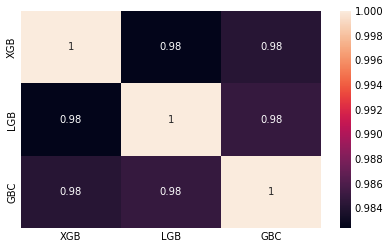

In [89]:
test_Survived_GBC = pd.Series(GBC_best.predict(test_rbst), name="GBC")
test_Survived_XGB = pd.Series(XGB_best.predict(test_rbst), name="XGB")
test_Survived_LGB = pd.Series(LGB_best.predict(test_rbst), name="LGB")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_LGB,
                              test_Survived_GBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [90]:
ensemble = np.expm1(0.1*test_Survived_GBC + 0.8*test_Survived_XGB + 0.1*test_Survived_LGB)
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": ensemble
})
submission.head()

,Id,SalePrice
0,1461,124248.433704
1,1462,164326.475767
2,1463,182287.972372
3,1464,194080.977320
4,1465,196969.716680


In [91]:
#보팅

from sklearn.ensemble import VotingRegressor

In [92]:
votingC = VotingRegressor(estimators=[('XGB', XGB_best), ('LGB', LGB_best), ('GBC',GBC_best)], n_jobs=4)
votingC = votingC.fit(X_rbst, target)  

In [93]:
test_SalePrice = pd.Series(votingC.predict(test_rbst), name="SalePrice")

In [94]:
submission = pd.DataFrame({
    "Id" :test['Id'],
    "SalePrice": np.expm1(test_SalePrice)
})
submission.head()

,Id,SalePrice
0,1461,127188.602100
1,1462,162676.519612
2,1463,180958.204824
3,1464,193965.915549
4,1465,189802.395403
